In [1]:
from sisyphus2.backend.models.basic import Basic, Basic_sigmoid, Basic_scan
from sisyphus2.backend.models.lstm import LSTM
from sisyphus2.tasks import task
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
rdm = task.rdm2(stim_noise = 0.02, coherences = np.linspace(.5, .55, 100), rec_noise = .01, N_rec = 50)
gen = rdm.generate_train_trials()
params = rdm.__dict__

In [3]:
params['loss_function'] = 'mean_squared_error'

In [4]:
params['load_weights_path'] = '../weights/test_50_rec.npz'

In [20]:
params['load_weights_path'] = '../weights/test_LSTM_50.npz'

In [16]:
train_params ={'save_weights_path': '../weights/test_50_rec.npz'}

In [4]:
model = Basic(params)

In [5]:
model.build()

In [6]:
model.train(gen, {'training_iters': 10000})

Iter 640, Minibatch Loss= 0.261216
Iter 1280, Minibatch Loss= 0.129961
Iter 1920, Minibatch Loss= 0.105059
Iter 2560, Minibatch Loss= 0.061788
Iter 3200, Minibatch Loss= 0.073304
Iter 3840, Minibatch Loss= 0.116358
Iter 4480, Minibatch Loss= 0.056261
Iter 5120, Minibatch Loss= 0.019886
Iter 5760, Minibatch Loss= 0.020917
Iter 6400, Minibatch Loss= 0.009040
Iter 7040, Minibatch Loss= 0.006814
Iter 7680, Minibatch Loss= 0.005035
Iter 8320, Minibatch Loss= 0.004687
Iter 8960, Minibatch Loss= 0.005015
Iter 9600, Minibatch Loss= 0.004678
Optimization finished!


([0.26121619,
  0.12996136,
  0.10505874,
  0.061788063,
  0.073303521,
  0.11635824,
  0.056260772,
  0.019885959,
  0.020916706,
  0.0090396265,
  0.0068141073,
  0.0050347303,
  0.0046869298,
  0.0050152009,
  0.0046781725],
 28.434033155441284,
 89.07130098342896)

In [7]:
model.destruct()

In [4]:
model = LSTM(params)

In [5]:
model.build()

In [6]:
losses, train_time, init_time = model.train(gen, {})

Iter 640, Minibatch Loss= 0.163602
Iter 1280, Minibatch Loss= 0.155212
Iter 1920, Minibatch Loss= 0.120798
Iter 2560, Minibatch Loss= 0.204562
Iter 3200, Minibatch Loss= 0.144229
Iter 3840, Minibatch Loss= 0.155693
Iter 4480, Minibatch Loss= 0.155138
Iter 5120, Minibatch Loss= 0.129102
Iter 5760, Minibatch Loss= 0.187818
Iter 6400, Minibatch Loss= 0.148965
Iter 7040, Minibatch Loss= 0.115507
Iter 7680, Minibatch Loss= 0.184764
Iter 8320, Minibatch Loss= 0.164402
Iter 8960, Minibatch Loss= 0.144027
Iter 9600, Minibatch Loss= 0.140232
Iter 10240, Minibatch Loss= 0.176523
Iter 10880, Minibatch Loss= 0.139872
Iter 11520, Minibatch Loss= 0.139024
Iter 12160, Minibatch Loss= 0.125314
Iter 12800, Minibatch Loss= 0.111510
Iter 13440, Minibatch Loss= 0.154253
Iter 14080, Minibatch Loss= 0.130807
Iter 14720, Minibatch Loss= 0.061512
Iter 15360, Minibatch Loss= 0.167650
Iter 16000, Minibatch Loss= 0.056418
Iter 16640, Minibatch Loss= 0.090835
Iter 17280, Minibatch Loss= 0.141417
Iter 17920, Minib

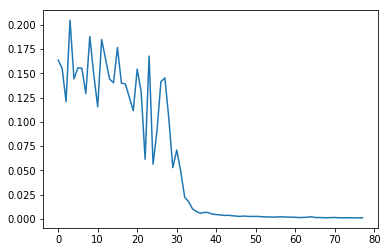

In [7]:
plt.plot(losses)

In [9]:
model.save('../weights/test_LSTM_50.npz')

In [10]:
tf.reset_default_graph()
model = Basic_sigmoid(params)

In [11]:
model.build()

In [12]:
model.train(gen, {})

Iter 640, Minibatch Loss= 0.195098
Iter 1280, Minibatch Loss= 0.155132
Iter 1920, Minibatch Loss= 0.115115
Iter 2560, Minibatch Loss= 0.183497
Iter 3200, Minibatch Loss= 0.128513
Iter 3840, Minibatch Loss= 0.124257
Iter 4480, Minibatch Loss= 0.179334
Iter 5120, Minibatch Loss= 0.133492
Iter 5760, Minibatch Loss= 0.125150
Iter 6400, Minibatch Loss= 0.152611
Iter 7040, Minibatch Loss= 0.166292
Iter 7680, Minibatch Loss= 0.139638
Iter 8320, Minibatch Loss= 0.124516
Iter 8960, Minibatch Loss= 0.159407
Iter 9600, Minibatch Loss= 0.111304
Iter 10240, Minibatch Loss= 0.176113
Iter 10880, Minibatch Loss= 0.181504
Iter 11520, Minibatch Loss= 0.136199
Iter 12160, Minibatch Loss= 0.146469
Iter 12800, Minibatch Loss= 0.128809
Iter 13440, Minibatch Loss= 0.147789
Iter 14080, Minibatch Loss= 0.160914
Iter 14720, Minibatch Loss= 0.135058
Iter 15360, Minibatch Loss= 0.172715
Iter 16000, Minibatch Loss= 0.137437
Iter 16640, Minibatch Loss= 0.148012
Iter 17280, Minibatch Loss= 0.172166
Iter 17920, Minib

(124.28856682777405, 72.06825804710388)

In [12]:
model = Basic_scan(params)

In [ ]:
model.build()

In [ ]:
model.train(gen, {'training_iters': 10000})

In [11]:
model.destruct()

In [21]:
model = Basic(params)
model.build()

In [8]:
x = gen.next()[0]

In [13]:
x = x[:64]

In [14]:
outputs, states = model.test_batch(x)

ValueError: Cannot feed value of shape (64, 200, 2) for Tensor u'Placeholder:0', which has shape '(128, 200, 2)'

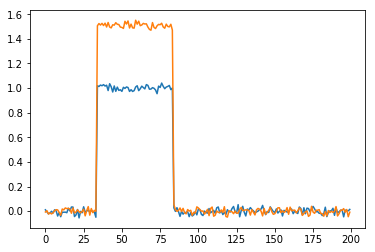

In [10]:
plt.plot(x[1,:,:])

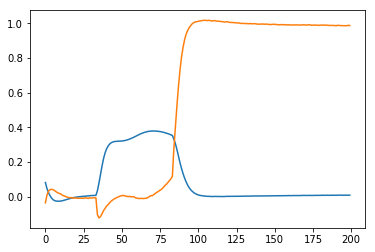

In [11]:
plt.plot(outputs[1,:,:])

In [60]:
outputs[1,2,1]

-0.052840549

In [61]:
x[1,2,1]

1.0008873123869966

In [20]:
weights = np.load('../weights/test_LSTM_50.npz')